# Animal Recognition Pipeline Demonstration
This notebook demonstrates how our pipeline analyzes text and images to recognize animals.


## Imports and project setup

In [1]:
import os
import sys
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random


ROOT = Path("..") 
SRC_PATH = ROOT / "src"
sys.path.append(str(SRC_PATH))

# Ocustom functions
from ner_inference import extract_animals
from cv_inference import classify_image

## Load animal classes

In [2]:
DATA_DIR = ROOT / "data" / "images"

# List folders in data directory (each folder represents an animal class)
classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print("Animal classes:", classes)


Animal classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


## Display a random image

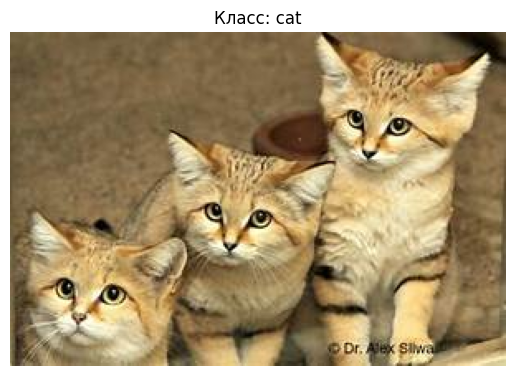

Text for recognition: There is a cat in the picture


In [3]:
# Select a random class and a random image from that class
cls = random.choice(classes)
folder_path = os.path.join(DATA_DIR, cls)
img_file = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, img_file)

# Open and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Класс: {cls}")
plt.show()

# Example text for NER inference
print(f"Text for recognition: There is a {cls} in the picture")


## Extract animals from text

In [4]:
sample_text = f"There is a {cls} in the picture"

# Use custom NER function to extract animal names from text
animals_extracted = extract_animals(sample_text)
print("Extracted from text:", animals_extracted)

Extracted from text: ['cat']


## Classify animal in image

In [5]:
# Use custom CV function to classify the animal in the image
animal_from_image = classify_image(img_path)
print("Predicted from image:", animal_from_image)

Predicted from image: cat


## Compare text and image predictions

In [6]:
# Check if the animal predicted from the image matches any extracted from the text
match = any(animal_from_image.lower() in a.lower() for a in animals_extracted)
print("Text and image match:", match)

Text and image match: True


## Iterate over all classes and compare predictions

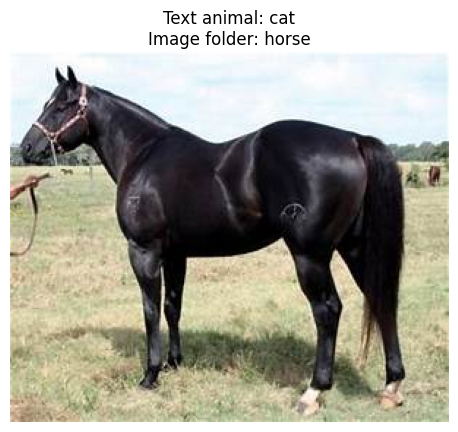

Text: There is a cat in the picture
Extracted from text: ['cat']
Predicted from image: horse
Match: False
--------------------------------------------------


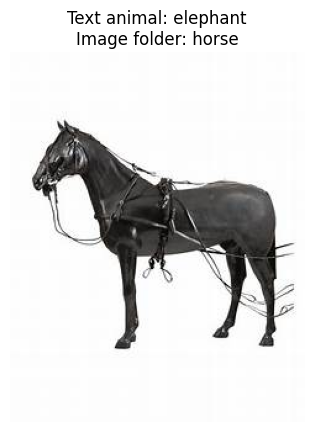

Text: There is a elephant in the picture
Extracted from text: ['elephant']
Predicted from image: horse
Match: False
--------------------------------------------------


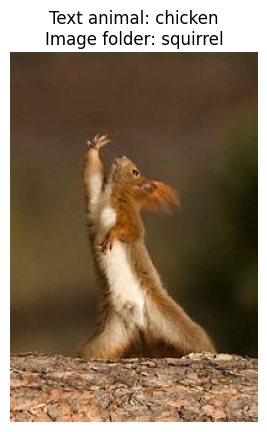

Text: There is a chicken in the picture
Extracted from text: ['chicken']
Predicted from image: squirrel
Match: False
--------------------------------------------------


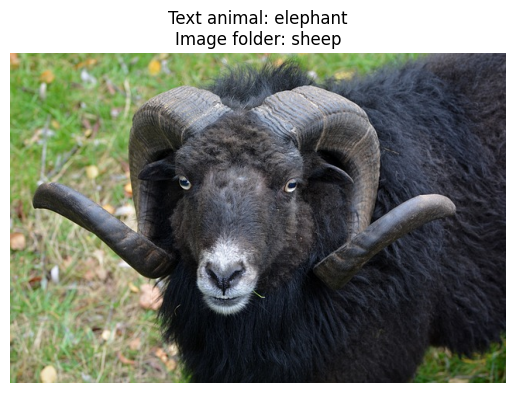

Text: There is a elephant in the picture
Extracted from text: ['elephant']
Predicted from image: sheep
Match: False
--------------------------------------------------


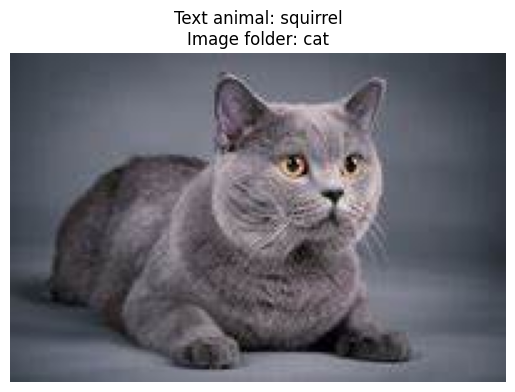

Text: There is a squirrel in the picture
Extracted from text: ['squirrel']
Predicted from image: cat
Match: False
--------------------------------------------------


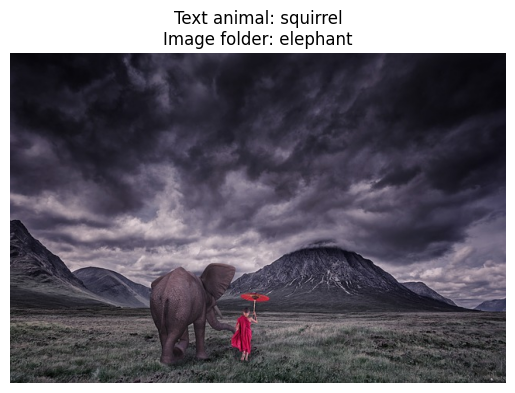

Text: There is a squirrel in the picture
Extracted from text: ['squirrel']
Predicted from image: elephant
Match: False
--------------------------------------------------


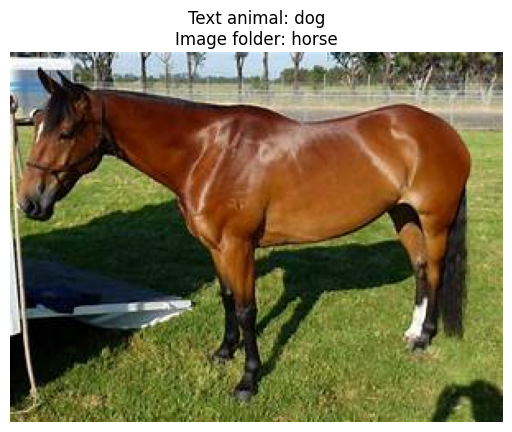

Text: There is a dog in the picture
Extracted from text: ['dog']
Predicted from image: horse
Match: False
--------------------------------------------------


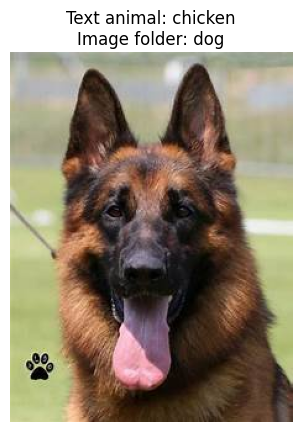

Text: There is a chicken in the picture
Extracted from text: ['chicken']
Predicted from image: dog
Match: False
--------------------------------------------------


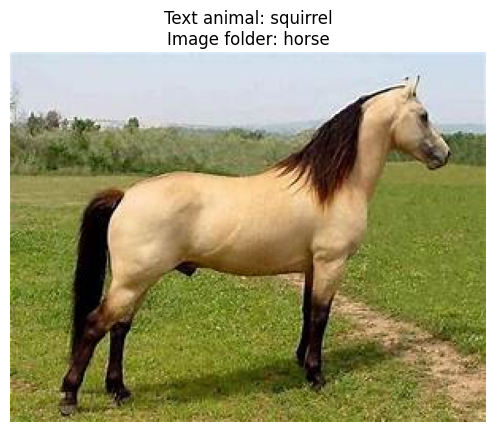

Text: There is a squirrel in the picture
Extracted from text: ['squirrel']
Predicted from image: horse
Match: False
--------------------------------------------------


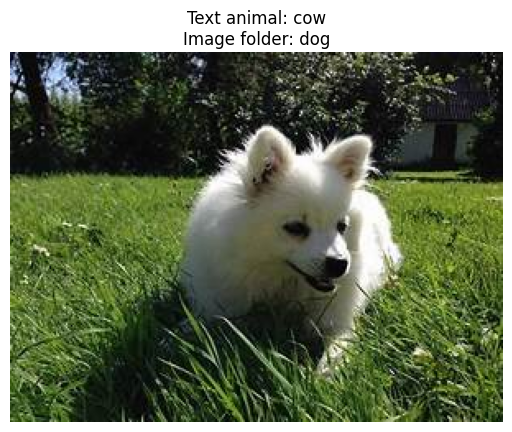

Text: There is a cow in the picture
Extracted from text: ['cow']
Predicted from image: dog
Match: False
--------------------------------------------------


In [12]:
# Loop over several random examples
for _ in range(len(classes)):

    # Select a random animal for the text
    text_class = random.choice(classes)
    sample_text = f"There is a {text_class} in the picture"

    # Select a random image (may or may not match the text)
    image_class = random.choice(classes)
    folder_path = os.path.join(DATA_DIR, image_class)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)

    # Display the image with info
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Text animal: {text_class}\nImage folder: {image_class}")
    plt.show()

    # Extract animal(s) from the sample text
    animals_extracted = extract_animals(sample_text)
    print("Text:", sample_text)
    print("Extracted from text:", animals_extracted)

    # Classify the animal in the image
    animal_from_image = classify_image(img_path)
    print("Predicted from image:", animal_from_image)


    # Check if the text matches the image
    match = any(animal_from_image.lower() in a.lower() for a in animals_extracted)
    print("Match:", match)
    print("-" * 50)
